# quant-econ Solutions: LLN and CLT

Solutions for http://quant-econ.net/jl/lln_clt.html


In [1]:
using Plots
pyplot()
using LaTeXStrings
using Distributions

## Exercise 1

Here is one solution

You might have to modify or delete the lines starting with `rc`, depending on your configuration

[Plots.jl] Initializing backend: pyplot


2016-07-27 19:08:52.655 julia[6915:507] setCanCycle: is deprecated.  Please use setCollectionBehavior instead



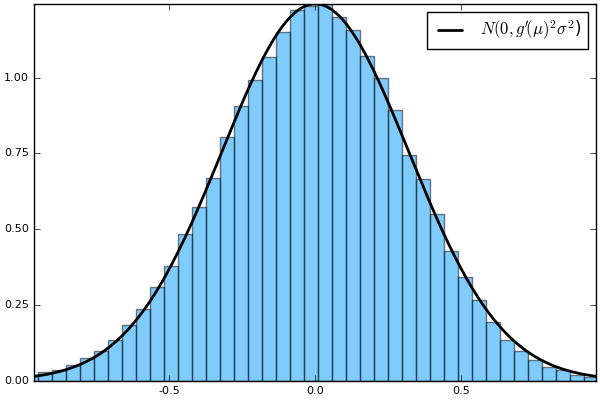

In [2]:
# == Set parameters == #
srand(42)  # reproducible results
n = 250    # Choice of n
k = 100000  # Number of draws of Y_n
dist = Uniform(0, pi/2)
mu, s = mean(dist), std(dist)

g = sin
g′ = cos

# == Draw underlying RVs. Each row contains a draw of X_1,..,X_n == #
data = rand(dist, (k, n))

# == Compute mean of each row, producing k draws of \bar X_n == #
sample_means = mean(data, 2)

error_obs = sqrt(n) .* (g(sample_means) - g(mu))

# == Plot == #
asymptotic_sd = g′(mu) .* s
xmin = -3 * g′(mu) * s
xmax = -xmin
histogram(error_obs, nbins=60, alpha=0.5, normed=true, label="")
xgrid = linspace(xmin, xmax, 200)
plot!(xgrid, pdf(Normal(0.0, asymptotic_sd), xgrid), color=:black,
      linewidth=2, label=LaTeXString("\$N(0, g'(\\mu)^2\\sigma^2\$)"),
      legendfont=font(12), xlims=(xmin, xmax), grid=false)

What happens when you replace $[0, \pi / 2]$ with $[0, \pi]$?

In this case, the mean $\mu$ of this distribution is $\pi/2$, and since $g' = \cos$, we have $g'(\mu) = 0$

Hence the conditions of the delta theorem are not satisfied


## Exercise 2

First we want to verify the claim that

$$
    \sqrt{n} \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu )
    \stackrel{d}{\to} 
    N(\mathbf 0, \mathbf I)
$$

This is straightforward given the facts presented in the exercise

Let

$$
    \mathbf Y_n := \sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu )
    \quad \text{and} \quad
    \mathbf Y \sim N(\mathbf 0, \Sigma)
$$

By the multivariate CLT and the continuous mapping theorem, we have

$$
    \mathbf Q \mathbf Y_n 
    \stackrel{d}{\to} 
    \mathbf Q \mathbf Y
$$

Since linear combinations of normal random variables are normal, the vector
$\mathbf Q \mathbf Y$ is also normal

Its mean is clearly $\mathbf 0$, and its variance covariance matrix is

$$
    \mathrm{Var}[\mathbf Q \mathbf Y]
    = \mathbf Q \mathrm{Var}[\mathbf Y] \mathbf Q'
    = \mathbf Q \Sigma \mathbf Q'
    = \mathbf I
$$

In conclusion, $\mathbf Q \mathbf Y_n \stackrel{d}{\to} \mathbf Q \mathbf Y \sim N(\mathbf 0, \mathbf I)$, which is what we aimed to show

Now we turn to the simulation exercise

Our solution is as follows



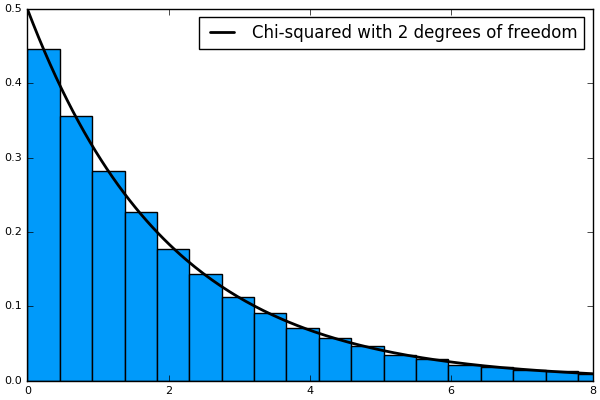

In [3]:
# == Set parameters == #
n = 250
replications = 50000
dw = Uniform(-1, 1)
du = Uniform(-2, 2)
sw, su = std(dw), std(du)
vw, vu = sw^2, su^2
Σ = [vw vw
     vw vw+vu]

# == Compute Sigma^{-1/2} == #
Q = inv(sqrtm(Σ)) 

# == Generate observations of the normalized sample mean == #
error_obs = Array(Float64, 2, replications)
for i=1:replications
    # == Generate one sequence of bivariate shocks == #
    X = Array(Float64, 2, n)
    W = rand(dw, n)
    U = rand(du, n)
    
    # == Construct the n observations of the random vector == #
    X[1, :] = W
    X[2, :] = W + U
    
    # == Construct the i-th observation of Y_n == #
    error_obs[:, i] = sqrt(n) .* mean(X, 2)
end

chisq_obs = squeeze(sum((Q*error_obs).^2, 1), 1)

# == Plot == #
xmin, xmax = 0, 8
histogram(chisq_obs, nbins=50, normed=true, label="")
xgrid = linspace(xmin, xmax, 200)
plot!(xgrid, pdf(Chisq(2), xgrid), color=:black,
      linewidth=2, label="Chi-squared with 2 degrees of freedom",
      legendfont=font(12), xlims=(xmin, xmax), grid=false)